# Text Complexity with *textstat*

Textstat is a Python library that is used to determine the complexity of a given text. 

It provides various measures of complexity, including the Flesch Reading Ease Score, the Flesch-Kincaid Grade Level, and the Automated Readability Index. 

These measures can be used to assess the readability of a text and help determine the appropriate audience for a given piece of content. 

Textstat also provides other useful metrics such as the number of words, sentences, and syllables in a text, as well as the average length of words and sentences. 

With Textstat, it is easy to analyze the complexity of a text and make informed decisions about its readability.

In [1]:
import textstat
import pandas as pd

In [2]:
test_data = (
    "Playing games has always been thought to be important to "
    "the development of well-balanced and creative children; "
    "however, what part, if any, they should play in the lives "
    "of adults has never been researched that deeply. I believe "
    "that playing games is every bit as important for adults "
    "as for children. Not only is taking time out to play games "
    "with our children and other adults valuable to building "
    "interpersonal relationships but is also a wonderful way "
    "to release built up tension.")

In [3]:
textstat.flesch_reading_ease(test_data)


52.23

In [4]:
textstat.flesch_kincaid_grade(test_data)

12.8

In [5]:
textstat.gunning_fog(test_data)

12.38

In [6]:
textstat.smog_index(test_data) # do it on text with more than 30 sentences

12.5

In [7]:
textstat.dale_chall_readability_score(test_data)

7.3

In [8]:
textstat.text_standard(test_data, float_output=False)

'12th and 13th grade'

## Implementing text complexity for our dataset

In [18]:
df = pd.read_csv('output-merged.csv')
df = df[['Title', 'Content']]
df

,Title,Content
0,\n Consumer confidence worsened in April ...,US consumer confidence worsened in April as Am...
1,\n GM earnings much better than expected ...,General Motors reported a much better-than-exp...
2,"\n Chevrolet Bolt, GM’s first popular ele...","The Chevrolet Bolt EV, General Motors first fu..."
3,\n New home sales rise for the fourth mon...,"New home sales rose in March, climbing for the..."
4,\n Tucker Carlson out at Fox News\n,"Fox News and Tucker Carlson, the right-wing ex..."
...,...,...
1180,Hospitals and health care facilities should dr...,Walensky told Congress that masking guidance ‘...
1181,ChatGPT for health care providers: Can the AI ...,"OpenAI CEO Sam Altman said that he was ""a litt..."
1182,Want to get better sleep? Exercise for this lo...,Get the rest you need with these simple tweaks...
1183,Massachusetts town says Avian Flu detected amo...,Fox News Flash top headlines are here. Check o...


In [19]:
df['Flesch Reading'] = 0
for i, row in df.iterrows():
    text = row['Content']  # replace 'text_column' with the name of the column containing the text
    score = textstat.flesch_reading_ease(text)
    df.loc[i, 'Flesch Reading'] = score

In [20]:
df['Flesch-Kincaid'] = 0
for i, row in df.iterrows():
    text = row['Content']  # replace 'text_column' with the name of the column containing the text
    score = textstat.flesch_kincaid_grade(text)
    df.loc[i, 'Flesch-Kincaid'] = score

In [21]:
df['Smog Index'] = 0
for i, row in df.iterrows():
    text = row['Content']  # replace 'text_column' with the name of the column containing the text
    score = textstat.smog_index(text)
    df.loc[i, 'Smog Index'] = score

In [22]:
df['Standard Score'] = 0
for i, row in df.iterrows():
    text = row['Content']  # replace 'text_column' with the name of the column containing the text
    score = textstat.text_standard(text, float_output=False)
    df.loc[i, 'Standard Score'] = score

In [23]:
df

,Title,Content,Flesch Reading,Flesch-Kincaid,Smog Index,Standard Score
0,\n Consumer confidence worsened in April ...,US consumer confidence worsened in April as Am...,50.36,11.4,13.4,13th and 14th grade
1,\n GM earnings much better than expected ...,General Motors reported a much better-than-exp...,70.53,7.8,10.6,9th and 10th grade
2,"\n Chevrolet Bolt, GM’s first popular ele...","The Chevrolet Bolt EV, General Motors first fu...",64.04,10.3,12.5,12th and 13th grade
3,\n New home sales rise for the fourth mon...,"New home sales rose in March, climbing for the...",60.85,9.4,11.9,10th and 11th grade
4,\n Tucker Carlson out at Fox News\n,"Fox News and Tucker Carlson, the right-wing ex...",60.14,9.7,12.2,11th and 12th grade
...,...,...,...,...,...,...
1180,Hospitals and health care facilities should dr...,Walensky told Congress that masking guidance ‘...,49.55,11.7,14.3,12th and 13th grade
1181,ChatGPT for health care providers: Can the AI ...,"OpenAI CEO Sam Altman said that he was ""a litt...",35.91,14.9,16.1,14th and 15th grade
1182,Want to get better sleep? Exercise for this lo...,Get the rest you need with these simple tweaks...,61.87,9.1,12.6,10th and 11th grade
1183,Massachusetts town says Avian Flu detected amo...,Fox News Flash top headlines are here. Check o...,58.01,10.5,12.6,12th and 13th grade


The table is an example of values. While the maximum score is 121.22, there is no limit on how low the score can be. A negative score is valid.
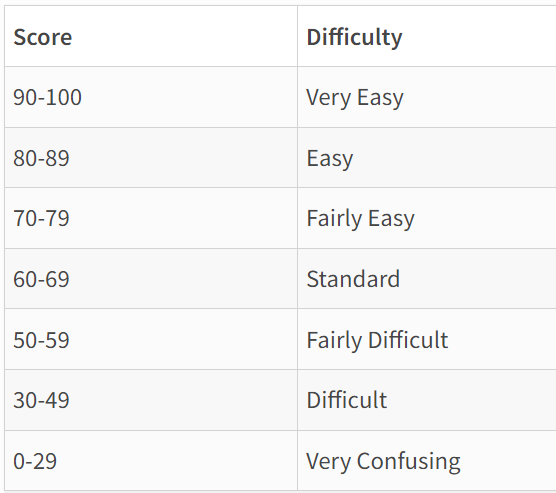

Text(0, 0.5, 'Frequency')

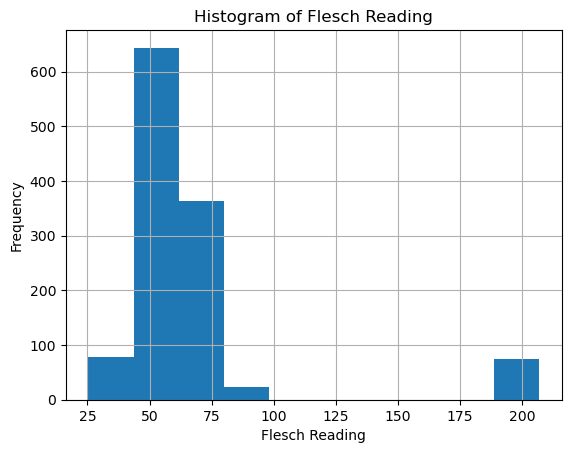

In [24]:
import matplotlib.pyplot as plt
df['Flesch Reading'].hist()
plt.title('Histogram of Flesch Reading')
plt.xlabel('Flesch Reading')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

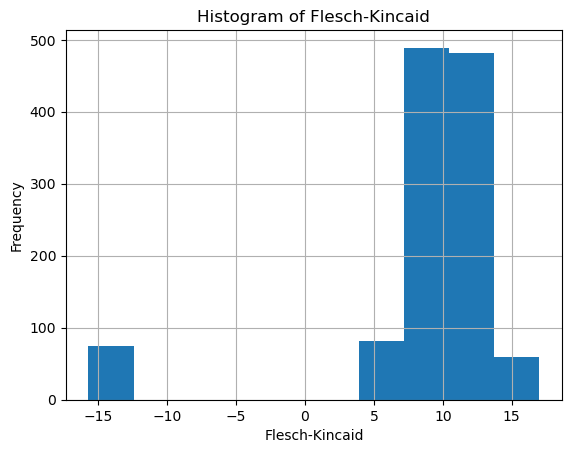

In [25]:
df['Flesch-Kincaid'].hist()
plt.title('Histogram of Flesch-Kincaid')
plt.xlabel('Flesch-Kincaid')
plt.ylabel('Frequency')

# score of 10-12 means a 10th to 12th grader can read the articles

Text(0, 0.5, 'Frequency')

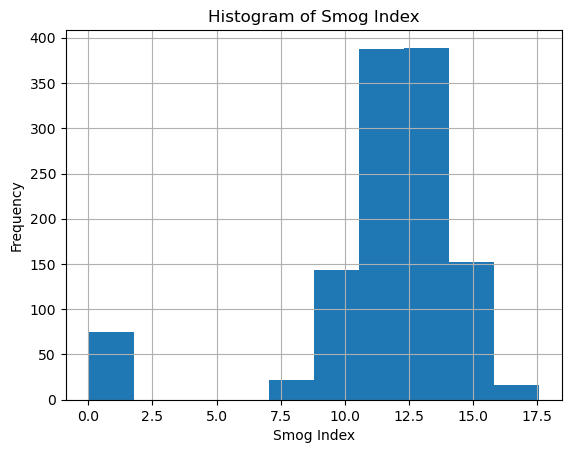

In [26]:
df['Smog Index'].hist()
plt.title('Histogram of Smog Index')
plt.xlabel('Smog Index')
plt.ylabel('Frequency')

# smog index of 12.5 means a 12th grader could read the article